In [1]:
## Importacíón librerias

import pandas as pd
import numpy as np
from src import soporte_funciones as spt

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Creación dataframes: 

In [3]:
df_activity = pd.read_csv('Customer Flight Activity.csv')
df_activity.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [4]:
df_loyalty = pd.read_csv('Customer Loyalty History.csv')
df_loyalty.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


## Fase 1: Exploración y Limpieza

### Exploración DF activity

In [5]:
# Columnas y filas: 
print(f"El número de filas que tenemos en el DF de 'Customer Flight Activity' es: {df_activity.shape[0]}, y el número de columnas es: {df_activity.shape[1]}")

El número de filas que tenemos en el DF de 'Customer Flight Activity' es: 405624, y el número de columnas es: 10


In [6]:
#Nombres de columnas: 
print(f"""Los nombres de las columnas que tenemos en el DF de 'Customer Flight Activity son:
       {df_activity.columns}""")


Los nombres de las columnas que tenemos en el DF de 'Customer Flight Activity son:
       Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')


In [7]:
#Info general: 
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [8]:
#Llamamos a la función de exploración del DF: 
spt.exploracion(df_activity)

El DataFrame tiene 405624 filas y 10 columnas.
Tiene 1864 datos duplicados, lo que supone un porcentaje de 0.46% de los datos. 

Hay 0 columnas con datos nulos, y son: 
[]

y sin nulos hay 10 columnas y son: 
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


A continuación tienes un detalle sobre los datos nulos y los tipos y número de datos:


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,16737
Year,0.0%,100.0%,int64,2
Month,0.0%,100.0%,int64,12
Flights Booked,0.0%,100.0%,int64,22
Flights with Companions,0.0%,100.0%,int64,12



El dataframe no tiene columnas categóricas. 

Principales estadísticos de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,16737
Year,0.0%,100.0%,int64,2
Month,0.0%,100.0%,int64,12
Flights Booked,0.0%,100.0%,int64,22
Flights with Companions,0.0%,100.0%,int64,12
Total Flights,0.0%,100.0%,int64,33
Distance,0.0%,100.0%,int64,4746
Points Accumulated,0.0%,100.0%,float64,1549
Points Redeemed,0.0%,100.0%,int64,587
Dollar Cost Points Redeemed,0.0%,100.0%,int64,49


### Exploración DF Loyalty History

In [9]:
# Columnas y filas: 
print(f"El número de filas que tenemos en el DF de 'Customer Loyalty History' es: {df_loyalty.shape[0]}, y el número de columnas es: {df_loyalty.shape[1]}")

El número de filas que tenemos en el DF de 'Customer Loyalty History' es: 16737, y el número de columnas es: 16


In [10]:
#Nombres de columnas: 
print(f"""Los nombres de las columnas que tenemos en el DF de 'Customer Loyalty History' son:
       {df_loyalty.columns}""")

Los nombres de las columnas que tenemos en el DF de 'Customer Loyalty History' son:
       Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')


In [11]:
#Info general: 
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [12]:
#Llamamos a la función de exploración del DF: 
spt.exploracion(df_loyalty)

El DataFrame tiene 16737 filas y 16 columnas.
Tiene 0 datos duplicados, lo que supone un porcentaje de 0.0% de los datos. 

Hay 3 columnas con datos nulos, y son: 
['Salary', 'Cancellation Year', 'Cancellation Month']

y sin nulos hay 13 columnas y son: 
['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month']


A continuación tienes un detalle sobre los datos nulos y los tipos y número de datos:


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,16737
Country,0.0%,100.0%,object,1
Province,0.0%,100.0%,object,11
City,0.0%,100.0%,object,29
Postal Code,0.0%,100.0%,object,55


Principales estadísticos de las columnas categóricas:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


Principales estadísticos de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,16737
Country,0.0%,100.0%,object,1
Province,0.0%,100.0%,object,11
City,0.0%,100.0%,object,29
Postal Code,0.0%,100.0%,object,55
Gender,0.0%,100.0%,object,2
Education,0.0%,100.0%,object,5
Salary,25.32%,74.68%,float64,5890
Marital Status,0.0%,100.0%,object,3
Loyalty Card,0.0%,100.0%,object,3


#### Gestión duplicados

In [14]:
df_activity['Loyalty Number'].sort_values(ascending=True)

0         100018
388723    100018
185911    100018
101406    100018
287317    100018
           ...  
304217    999986
321118    999986
354920    999986
185910    999986
405623    999986
Name: Loyalty Number, Length: 405624, dtype: int64

In [15]:
df_loyalty['Loyalty Number'].sort_values(ascending=True)

2320     100018
4502     100102
4380     100140
167      100214
14277    100272
          ...  
2018     999902
8231     999911
9493     999940
11394    999982
10009    999986
Name: Loyalty Number, Length: 16737, dtype: int64

In [16]:
## Ver si los duplicados se dan en mas de una ocasión por fila: 

duplicados_totales = df_activity.duplicated(keep=False).sum()
duplicados_sin_primera_aparicion = df_activity.duplicated().sum()

print(f"""El df_activity tiene {df_activity.shape[0]} filas y {df_activity.shape[1]} columnas.
Tiene {duplicados_totales} filas duplicadas (incluyendo la primera aparición).
Excluyendo la primera, hay {duplicados_sin_primera_aparicion} filas duplicadas.""")


El df_activity tiene 405624 filas y 10 columnas.
Tiene 3712 filas duplicadas (incluyendo la primera aparición).
Excluyendo la primera, hay 1864 filas duplicadas.


In [17]:
##pd.set_option('display.max_rows', None)

In [18]:
#Ver filas duplicadas: 
filas_duplicadas = df_activity[df_activity.duplicated(keep=False)]
filas_duplicadas

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [19]:
spt.exploracion(filas_duplicadas)

El DataFrame tiene 3712 filas y 10 columnas.
Tiene 1864 datos duplicados, lo que supone un porcentaje de 50.22% de los datos. 

Hay 0 columnas con datos nulos, y son: 
[]

y sin nulos hay 10 columnas y son: 
['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


A continuación tienes un detalle sobre los datos nulos y los tipos y número de datos:


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,159
Year,0.0%,100.0%,int64,2
Month,0.0%,100.0%,int64,12
Flights Booked,0.0%,100.0%,int64,1
Flights with Companions,0.0%,100.0%,int64,1



El dataframe no tiene columnas categóricas. 

Principales estadísticos de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,3712.0,584833.870690,251219.499947,101902.0,373638.0,584833.0,776466.0,992168.0
Year,3712.0,2017.424569,0.494344,2017.0,2017.0,2017.0,2018.0,2018.0
Month,3712.0,6.211746,3.454893,1.0,3.0,6.0,9.0,12.0
Flights Booked,3712.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Flights with Companions,3712.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Total Flights,3712.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Distance,3712.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Points Accumulated,3712.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Points Redeemed,3712.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Dollar Cost Points Redeemed,3712.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


,% nulos,% no_nulos,tipo_dato,num_valores_unicos
Loyalty Number,0.0%,100.0%,int64,159
Year,0.0%,100.0%,int64,2
Month,0.0%,100.0%,int64,12
Flights Booked,0.0%,100.0%,int64,1
Flights with Companions,0.0%,100.0%,int64,1
Total Flights,0.0%,100.0%,int64,1
Distance,0.0%,100.0%,int64,1
Points Accumulated,0.0%,100.0%,float64,1
Points Redeemed,0.0%,100.0%,int64,1
Dollar Cost Points Redeemed,0.0%,100.0%,int64,1


In [20]:
## Los valores duplicados parecen ser redundantes. Se repite en una o más ocasiones el mismo Loyalty Number, Año y Mes - pero el resto de los valores de las columnas es de 0. Por lo que eliminamos los duplicados. 
## Están guardados en un DF (filas_duplicadas) y los pasamos a CSV por si en un futuro hay que restaurarlos: 

filas_duplicadas.to_csv("filas_duplicadas.csv", index=False)

In [21]:
#Eliminación duplicados: 

df_activity_sin_duplicados = df_activity.drop_duplicates(keep='first')

In [22]:
#Verificamos que no haya duplicados y cantidad total de filas (debería haber)
df_activity_sin_duplicados.duplicated().sum()

0

In [23]:
df_activity_sin_duplicados.shape[0] #Antes tenía 405624 filas. Eliminamos 1864 datos duplicados. El total debería ser 403760.

403760

In [24]:
## Comprobamos que en los casos que tenga el mismo loyalty number el resto de las columnas no sean iguales: 

df_activity_sin_duplicados.sort_values('Loyalty Number')

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
46353,100018,2018,10,6,4,10,3110,311.0,385,31
321119,100018,2018,8,0,0,0,0,0.0,0,0
270416,100018,2018,5,0,0,0,0,0.0,0,0
50703,100018,2017,4,4,0,4,924,92.0,0,0
...,...,...,...,...,...,...,...,...,...,...
16900,999986,2017,1,1,0,1,1849,184.0,0,0
140741,999986,2018,8,8,1,9,3672,367.0,655,53
135207,999986,2017,8,12,0,12,1716,171.0,0,0
33801,999986,2017,2,7,0,7,3017,301.0,0,0


### Union de datos

In [25]:
len(df_activity_sin_duplicados['Loyalty Number'].unique()) 

16737

In [26]:
len(df_loyalty['Loyalty Number'].unique())

16737

In [27]:
df_activity_sin_duplicados.shape

(403760, 10)

In [28]:
df_activity_sin_duplicados.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [29]:
df_loyalty.shape

(16737, 16)

In [30]:
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [31]:
df_merged = df_activity_sin_duplicados.merge(df_loyalty, how='outer', on='Loyalty Number')
df_merged.shape


(403760, 25)

In [32]:
df_merged

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403756,999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403757,999986,2018,10,6,0,6,708,70.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403758,999986,2018,11,11,4,15,2040,204.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [33]:
df_merged.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

In [34]:
df_concat = pd.concat([df_activity_sin_duplicados, df_loyalty], axis=0, ignore_index = True)
df_concat.shape

(420497, 25)

In [35]:
df_concat.isnull().sum()

Loyalty Number                      0
Year                            16737
Month                           16737
Flights Booked                  16737
Flights with Companions         16737
Total Flights                   16737
Distance                        16737
Points Accumulated              16737
Points Redeemed                 16737
Dollar Cost Points Redeemed     16737
Country                        403760
Province                       403760
City                           403760
Postal Code                    403760
Gender                         403760
Education                      403760
Salary                         407998
Marital Status                 403760
Loyalty Card                   403760
CLV                            403760
Enrollment Type                403760
Enrollment Year                403760
Enrollment Month               403760
Cancellation Year              418430
Cancellation Month             418430
dtype: int64

In [36]:
df_concat

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017.0,1.0,3.0,0.0,3.0,1521.0,152.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100102,2017.0,1.0,10.0,4.0,14.0,2030.0,203.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100140,2017.0,1.0,6.0,0.0,6.0,1200.0,120.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100214,2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100272,2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420492,823768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012.0,12.0,NaN,NaN
420493,680886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014.0,9.0,NaN,NaN
420494,776187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014.0,3.0,NaN,NaN
420495,906428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018.0,4.0,NaN,NaN


In [37]:
### Sigo con Merged y mañana consultar porque no se suman las filas al hacer outer

#### Limpieza de Datos:

In [38]:
# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


##### Gestion de nulos: 

In [39]:
# Ver porcentaje de nulos por columna: 

porc_nulos = (df_merged.isnull().sum() / df_merged.shape[0]) * 100
porc_nulos

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Mon

In [40]:
# la lista de columnas numericas que tienen nulos: 
nulos_esta_num = df_merged[df_merged.columns[df_merged.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')


In [41]:
## Ver el número de nulos que tenemos en cada una de las columnas numericas
df_merged[nulos_esta_num].isnull().sum() / df_merged.shape[0] 

Salary                0.253269
Cancellation Year     0.877031
Cancellation Month    0.877031
dtype: float64

In [42]:
## 1) Salary: Ingreso anual estimado del cliente

In [43]:
## Verificar valores por orden en la columna salario: 
df_merged['Salary'].sort_values()

22973    -58486.0
22989    -58486.0
22988    -58486.0
22987    -58486.0
22986    -58486.0
           ...   
403731        NaN
403732        NaN
403733        NaN
403734        NaN
403735        NaN
Name: Salary, Length: 403760, dtype: float64

In [44]:
## Como hay valores negativos, se pasan a positivo: 
df_merged['Salary'] = df_merged['Salary'].apply(spt.negativos)

In [45]:
## Comprobamos el cambio: 
df_merged['Salary'].sort_values()

118817    9081.0
118798    9081.0
118799    9081.0
118800    9081.0
118801    9081.0
           ...  
403731       NaN
403732       NaN
403733       NaN
403734       NaN
403735       NaN
Name: Salary, Length: 403760, dtype: float64

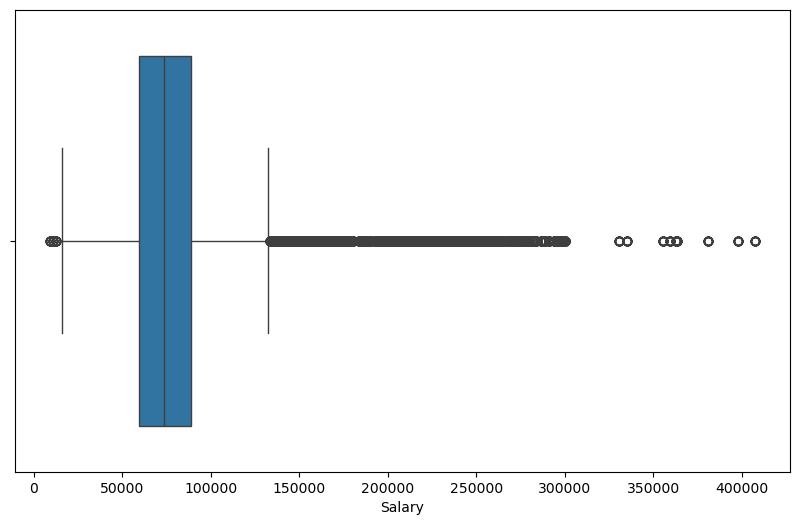

<Figure size 640x480 with 0 Axes>

In [46]:
## Verificamos si hay datos atípicos:

fig, ax = plt.subplots(figsize=(10, 6))

# Genera el boxplot para la columna especificada
sns.boxplot(x='Salary', data=df_merged, ax=ax)

# Muestra el gráfico
plt.show()
plt.tight_layout();

In [47]:
## Calculamos promedios de Salary por cada nivel de Education
promedios_salarios = df_merged.groupby('Education')['Salary'].mean()
promedios_salarios 

Education
Bachelor                 72599.080913
College                           NaN
Doctor                  178403.675202
High School or Below     61146.378165
Master                  103734.523724
Name: Salary, dtype: float64

In [48]:
## Verificamos si todos los nulos de la columna Salario tienen Education type College: 

In [49]:
nulos_por_education = df_merged['Salary'].isnull().groupby(df_merged['Education']).sum()
nulos_por_education

Education
Bachelor                     0
College                 102260
Doctor                       0
High School or Below         0
Master                       0
Name: Salary, dtype: int64

In [50]:
df_merged['Salary'].isnull().sum()

102260

In [51]:
## Conclusión: los nulos de la categoria 'Salary' son todos de 'Education' = 'College'

In [52]:
## Como hay algunos valores atipicos, reemplazamos por la mediana

df_merged['Salary'].median()

73479.0

In [53]:
media_salario = df_merged["Salary"].mean()

# aplicamos el método 'fillna()' a la columna
df_merged["Salary"] = df_merged["Salary"].fillna(media_salario)

# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df_merged['Salary'].isnull().sum()} nulos")

Después del 'fillna' tenemos 0 nulos


In [54]:
##Cancellation Year: "Año en que el cliente canceló su membresía en el programa de lealtad, si aplica" --> Estimamos que al estar nulo el cliente aun no ha cancelado, por lo que dejamos el valor nulo por si en algún momento (cuando el cliente cancele) es necesario rellenarlo
##Cancellation Month: "Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica" --> Estimamos que al estar nulo el cliente aun no ha cancelado, por lo que dejamos el valor nulo por si en algún momento (cuando el cliente cancele) es necesario rellenarlo

In [55]:
df_merged

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403756,999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403757,999986,2018,10,6,0,6,708,70.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403758,999986,2018,11,11,4,15,2040,204.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [56]:
## Reemplazamos espacios por guiones bajos y pasamos a minuscula para homogeneizar: 

spt.espacios_guion_bajo(df_merged)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403756,999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403757,999986,2018,10,6,0,6,708,70.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403758,999986,2018,11,11,4,15,2040,204.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [57]:
df_merged

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403756,999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403757,999986,2018,10,6,0,6,708,70.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
403758,999986,2018,11,11,4,15,2040,204.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [ ]:
## 

#### 

## Fase 2: Visualización

#### 1) ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [59]:
df_merged['flights_booked']

0          3
1          2
2          6
3          4
4          0
          ..
403755    15
403756     0
403757     6
403758    11
403759     0
Name: flights_booked, Length: 403760, dtype: int64

In [58]:
df_merged['month']

0          1
1          2
2         10
3          4
4          5
          ..
403755     7
403756     9
403757    10
403758    11
403759    12
Name: month, Length: 403760, dtype: int64

In [60]:
df_merged['year'].unique()

array([2017, 2018])

In [64]:
vuelos_por_mes = df_merged.groupby(["year", "month"])["flights_booked"].sum().reset_index(name="flights_booked")
vuelos_por_mes

,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


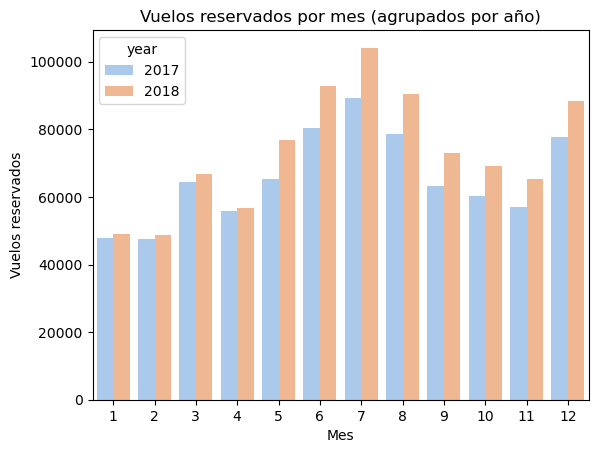

In [85]:
## Gráfico de barras: 
sns.barplot(data=vuelos_por_mes, x="month", y="flights_booked", hue="year", palette="pastel")
plt.title("Vuelos reservados por mes (agrupados por año)")
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados");

In [ ]:
## Conclusión: 
## A) Las reservas del año 2018 superan a las del año 2017. 
## B) A principios del año hay menos reservas
## C) Los meses de verano (Cánada) tienen un aumento de reservas, así como también el mes de diciembre. 


#### 2) ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [105]:
df_merged['distance'].value_counts()

distance
0       196128
2520       410
2880       401
1680       389
2160       365
         ...  
2111         1
3433         1
3347         1
5984         1
5676         1
Name: count, Length: 4746, dtype: int64

In [106]:
df_merged['points_accumulated'].value_counts()

points_accumulated
0.00      196128
180.00       763
270.00       734
288.00       717
189.00       709
           ...  
11.25          1
613.00         1
614.00         1
583.50         1
658.50         1
Name: count, Length: 1549, dtype: int64

Text(0, 0.5, 'Puntos acumulados')

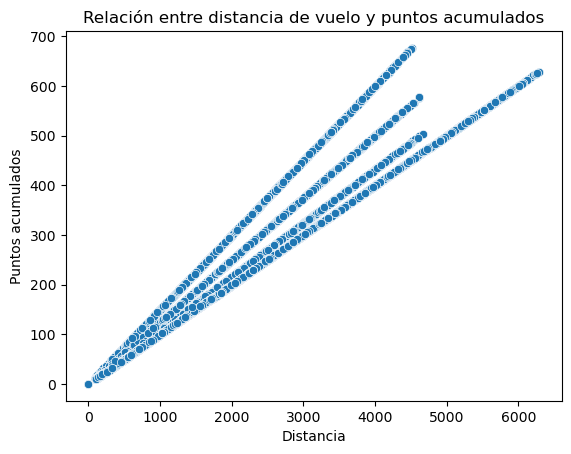

In [104]:

sns.scatterplot(data=df_merged, x='distance', y='points_accumulated')
plt.title('Relación entre distancia de vuelo y puntos acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos acumulados')


In [ ]:
## Conclusión: el gráfico muestra que a mayor distancia del vuelo, más puntos acumulados. 
## Por lo que parece haber una relación directa (cuanto más largo es el vuelo, más puntos se obtienen). 

#### 3) ¿Cuál es la distribución de los clientes por provincia o estado?